In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar
import highlight_text

In [194]:
Player_1 = 'Phil Foden'
Player_2 = 'David Silva'
Color_1 = 'deepskyblue'
Color_2 = 'white'
Team_1 = 'Manchester City'
Team_2 = 'Manchester City'

In [195]:
myfont = {'fontname':'DejaVu Sans'}

In [196]:
df1std = pd.read_csv('Foden Standard.txt')
numbers1 = len(df1std['Season'])
df1name = pd.DataFrame({'Player': Player_1 , 'Season': df1std['Season'][0:numbers1]})
df1std = df1std[df1std.LgRank != '6th']

df1std = pd.merge(df1std,df1name,on='Season',how='outer')
df1std = df1std[ ['Player'] + [ col for col in df1std.columns if col != 'Player' ] ]
df1std = df1std.drop_duplicates()
df1std = df1std.reset_index(drop=True)

df2std = pd.read_csv('Silva Standard.txt')
numbers2 = len(df2std['Season'])
df2name = pd.DataFrame({'Player': Player_2 , 'Season': df2std['Season'][0:numbers2]})

df2std = pd.merge(df2std,df2name,on='Season',how='outer')
df2std = df2std[ ['Player'] + [ col for col in df2std.columns if col != 'Player' ] ]
df2std = df2std.reset_index(drop=True)

In [197]:
df1pas = pd.read_csv('Foden Passing.txt')
df1pas = df1pas[df1pas.LgRank != '6th']
df1pas = df1pas.reset_index(drop=True)

df1cre = pd.read_csv('Foden G&S Creation.txt')
df1cre = df1cre[df1cre.LgRank != '6th']
df1cre = df1cre.reset_index(drop=True)

df1pos = pd.read_csv('Foden Possession.txt')
df1pos = df1pos[df1pos.LgRank != '6th']
df1pos = df1pos.reset_index(drop=True)

In [198]:
df2pas = pd.read_csv('Silva Passing.txt')
df2pass = df2pas.reset_index(drop=True)

df2cre = pd.read_csv('Silva G&S Creation.txt')
df2cre = df2cre.reset_index(drop=True)

df2pos = pd.read_csv('Silva Possession.txt')
df2pos = df2pos.reset_index(drop=True)

In [199]:
df1 = pd.merge(df1std,df1pas, on='Season',how='outer')
df1 = pd.merge(df1, df1cre, on='Season',how='outer')
df1 = pd.merge(df1, df1pos, on='Season',how='outer')

df2 = pd.merge(df2std,df2pas, on='Season', how='outer')
df2 = pd.merge(df2, df2cre, on='Season', how='outer')
df2 = pd.merge(df2, df2pos, on='Season', how='outer')

In [200]:
df1 = df1.dropna()
df2 = df2.dropna()

In [201]:
df = df1.append(df2, ignore_index=True)
df

,Player,Season,Age_x,Squad_x,Country_x,Comp_x,LgRank_x,MP,Starts,Min,...,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches_y
0,Phil Foden,2017-2018,17,Manchester City,eng ENG,1. Premier League,1st,5,0,49,...,16.00,4.00,2.00,4.00,0.00,102.0,92.0,90.2,8.00,Matches
1,Phil Foden,2018-2019,18,Manchester City,eng ENG,1. Premier League,1st,13,3,335,...,10.30,3.51,1.35,0.81,0.81,73.0,61.6,84.4,12.70,Matches
2,Phil Foden,2019-2020,19,Manchester City,eng ENG,1. Premier League,2nd,23,9,901,...,7.30,2.40,1.10,1.00,2.30,59.1,51.6,87.3,8.80,Matches
3,Phil Foden,2020-2021,20,Manchester City,eng ENG,1. Premier League,1st,21,13,1250,...,7.70,1.80,2.23,1.80,1.73,56.3,45.7,81.2,8.92,Matches
4,David Silva,2017-2018,31,Manchester City,eng ENG,1. Premier League,1st,29,28,2430,...,13.00,4.96,1.37,1.15,1.19,91.8,84.5,92.1,10.40,Matches
5,David Silva,2018-2019,32,Manchester City,eng ENG,1. Premier League,1st,33,28,2401,...,9.81,3.22,1.50,1.01,1.05,80.9,71.6,88.5,11.40,Matches
6,David Silva,2019-2020,33,Manchester City,eng ENG,1. Premier League,2nd,27,22,1826,...,9.21,3.40,1.23,1.43,0.94,79.5,69.2,87.0,12.20,Matches
7,David Silva,2020-2021,34,Real Sociedad,es ESP,1. La Liga,5th,16,13,1123,...,5.92,1.84,0.32,0.96,0.96,51.7,45.0,87.0,4.72,Matches


In [202]:
print(df.columns.tolist())

['Player', 'Season', 'Age_x', 'Squad_x', 'Country_x', 'Comp_x', 'LgRank_x', 'MP', 'Starts', 'Min', '90s_x', 'Gls', 'Ast_x', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA_x', 'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Matches_x', 'Age_y', 'Squad_y', 'Country_y', 'Comp_y', 'LgRank_y', '90s_y', 'Cmp', 'Att_x', 'Cmp%', 'TotDist_x', 'PrgDist_x', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast_y', 'xA_y', 'A-xA', 'KP', '1/3_x', 'PPA', 'CrsPA', 'Prog_x', 'Matches_y', 'Age_x', 'Squad_x', 'Country_x', 'Comp_x', 'LgRank_x', '90s_x', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'Drib.1', 'Sh.1', 'Fld.1', 'Def.1', 'OG', 'Matches_x', 'Age_y', 'Squad_y', 'Country_y', 'Comp_y', 'LgRank_y', '90s_y', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Succ', 'Att_y', 'Succ%', '#Pl', 'Megs', 'Carries', 

In [203]:
df = df[['Player','Season','Min','G+A','xG+xA','Cmp','Cmp%','PrgDist_x','KP','1/3_x', 'PPA','Prog_x','SCA90','GCA90','Att 3rd','Att Pen','Succ','Prog_y','1/3_y','Prog.1']]
df

,Player,Season,Min,G+A,xG+xA,Cmp,Cmp%,PrgDist_x,KP,1/3_x,PPA,Prog_x,SCA90,GCA90,Att 3rd,Att Pen,Succ,Prog_y,1/3_y,Prog.1
0,Phil Foden,2017-2018,49,1.84,0.64,82.0,85.4,114.0,4.00,2.00,0.00,0.00,12.27,4.09,70.0,6.00,6.00,16.00,4.00,8.00
1,Phil Foden,2018-2019,335,0.27,0.83,54.6,86.0,123.2,2.16,2.43,2.16,4.86,3.76,0.27,38.4,7.84,2.43,10.30,3.51,12.70
2,Phil Foden,2019-2020,901,0.70,0.63,43.1,84.8,135.7,1.80,2.80,1.30,3.20,4.50,0.80,35.6,7.20,2.40,7.30,2.40,8.80
3,Phil Foden,2020-2021,1250,0.65,0.51,37.8,81.4,116.4,1.87,1.87,1.15,3.24,3.46,0.65,37.1,8.27,2.30,7.70,1.80,8.92
4,David Silva,2017-2018,2430,0.74,0.50,79.1,87.2,283.1,2.22,6.67,3.19,7.52,4.80,0.89,48.4,6.19,0.63,13.00,4.96,10.40
5,David Silva,2018-2019,2401,0.52,0.60,66.8,85.6,238.7,2.73,5.09,3.15,6.97,5.40,0.71,44.0,8.35,1.01,9.81,3.22,11.40
6,David Silva,2019-2020,1826,0.79,0.58,65.0,87.2,207.3,2.27,4.38,3.10,6.90,5.52,0.99,42.1,8.87,1.67,9.21,3.40,12.20
7,David Silva,2020-2021,1123,0.40,0.27,43.7,84.8,200.5,1.28,4.96,3.60,7.04,3.54,0.95,22.1,2.56,1.36,5.92,1.84,4.72


In [204]:
df.columns = ['Player','Season','Minutes','G+A','xG+xA','Passes Completed','Pass Completion %','Prog. Pass Distance','Key Passes','Passes Into Final Third', 'Passes Into Opposition Box','Prog. Passes','Shot Creating Actions','Goal Creating Actions','Successful Dribbles','Touches In Final Third','Touches In Opp. Box','Prog. Carries','Carries Into Final Third','Prog. Passes Received']
df

,Player,Season,Minutes,G+A,xG+xA,Passes Completed,Pass Completion %,Prog. Pass Distance,Key Passes,Passes Into Final Third,Passes Into Opposition Box,Prog. Passes,Shot Creating Actions,Goal Creating Actions,Successful Dribbles,Touches In Final Third,Touches In Opp. Box,Prog. Carries,Carries Into Final Third,Prog. Passes Received
0,Phil Foden,2017-2018,49,1.84,0.64,82.0,85.4,114.0,4.00,2.00,0.00,0.00,12.27,4.09,70.0,6.00,6.00,16.00,4.00,8.00
1,Phil Foden,2018-2019,335,0.27,0.83,54.6,86.0,123.2,2.16,2.43,2.16,4.86,3.76,0.27,38.4,7.84,2.43,10.30,3.51,12.70
2,Phil Foden,2019-2020,901,0.70,0.63,43.1,84.8,135.7,1.80,2.80,1.30,3.20,4.50,0.80,35.6,7.20,2.40,7.30,2.40,8.80
3,Phil Foden,2020-2021,1250,0.65,0.51,37.8,81.4,116.4,1.87,1.87,1.15,3.24,3.46,0.65,37.1,8.27,2.30,7.70,1.80,8.92
4,David Silva,2017-2018,2430,0.74,0.50,79.1,87.2,283.1,2.22,6.67,3.19,7.52,4.80,0.89,48.4,6.19,0.63,13.00,4.96,10.40
5,David Silva,2018-2019,2401,0.52,0.60,66.8,85.6,238.7,2.73,5.09,3.15,6.97,5.40,0.71,44.0,8.35,1.01,9.81,3.22,11.40
6,David Silva,2019-2020,1826,0.79,0.58,65.0,87.2,207.3,2.27,4.38,3.10,6.90,5.52,0.99,42.1,8.87,1.67,9.21,3.40,12.20
7,David Silva,2020-2021,1123,0.40,0.27,43.7,84.8,200.5,1.28,4.96,3.60,7.04,3.54,0.95,22.1,2.56,1.36,5.92,1.84,4.72


In [205]:
df = df.drop([0, 7])
df

,Player,Season,Minutes,G+A,xG+xA,Passes Completed,Pass Completion %,Prog. Pass Distance,Key Passes,Passes Into Final Third,Passes Into Opposition Box,Prog. Passes,Shot Creating Actions,Goal Creating Actions,Successful Dribbles,Touches In Final Third,Touches In Opp. Box,Prog. Carries,Carries Into Final Third,Prog. Passes Received
1,Phil Foden,2018-2019,335,0.27,0.83,54.6,86.0,123.2,2.16,2.43,2.16,4.86,3.76,0.27,38.4,7.84,2.43,10.30,3.51,12.70
2,Phil Foden,2019-2020,901,0.70,0.63,43.1,84.8,135.7,1.80,2.80,1.30,3.20,4.50,0.80,35.6,7.20,2.40,7.30,2.40,8.80
3,Phil Foden,2020-2021,1250,0.65,0.51,37.8,81.4,116.4,1.87,1.87,1.15,3.24,3.46,0.65,37.1,8.27,2.30,7.70,1.80,8.92
4,David Silva,2017-2018,2430,0.74,0.50,79.1,87.2,283.1,2.22,6.67,3.19,7.52,4.80,0.89,48.4,6.19,0.63,13.00,4.96,10.40
5,David Silva,2018-2019,2401,0.52,0.60,66.8,85.6,238.7,2.73,5.09,3.15,6.97,5.40,0.71,44.0,8.35,1.01,9.81,3.22,11.40
6,David Silva,2019-2020,1826,0.79,0.58,65.0,87.2,207.3,2.27,4.38,3.10,6.90,5.52,0.99,42.1,8.87,1.67,9.21,3.40,12.20


In [206]:
#df = df.iloc[[0,4],:]
#df = df.iloc[[1,5],:]
df = df.iloc[[2,5],:]

In [207]:
df = df.drop(columns=['Minutes','xG+xA','Touches In Opp. Box','Passes Into Opposition Box','Key Passes','Shot Creating Actions','Passes Into Opposition Box','Prog. Carries']).reset_index(drop=True)
df

,Player,Season,G+A,Passes Completed,Pass Completion %,Prog. Pass Distance,Passes Into Final Third,Prog. Passes,Goal Creating Actions,Successful Dribbles,Touches In Final Third,Carries Into Final Third,Prog. Passes Received
0,Phil Foden,2020-2021,0.65,37.8,81.4,116.4,1.87,3.24,0.65,37.1,8.27,1.8,8.92
1,David Silva,2019-2020,0.79,65.0,87.2,207.3,4.38,6.90,0.99,42.1,8.87,3.4,12.20


In [208]:
for w in range(len(df['Player'])):
    if df['Player'][w] == Player_1:
        Team_1 = df.iloc[w].values.tolist()
Team_1 = Team_1[1]

for w in range(len(df['Player'])):
    if df['Player'][w] == Player_2:
        Team_2 = df.iloc[w].values.tolist()
Team_2 = Team_2[1]

In [209]:
df = df.drop(columns=['Season'])

In [210]:
'''for w in range(len(df['Player'])):
    if df['Player'][w] == Player_1:
        Team_1 = df.iloc[w].values.tolist()

Team_1 = Team_1[4]

for w in range(len(df['Player'])):
    if df['Player'][w] == Player_2:
        Team_2 = df.iloc[w].values.tolist()

Team_2 = Team_2[4]'''

"for w in range(len(df['Player'])):\n    if df['Player'][w] == Player_1:\n        Team_1 = df.iloc[w].values.tolist()\n\nTeam_1 = Team_1[4]\n\nfor w in range(len(df['Player'])):\n    if df['Player'][w] == Player_2:\n        Team_2 = df.iloc[w].values.tolist()\n\nTeam_2 = Team_2[4]"

In [211]:
params = list(df.columns)
params = params[1:] # will exclude the column Player from the df

In [212]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    #a = a - (a*.25) # 0.25 katı kadar pay bırakacak
    a=0
    
    b = max(df[params][x])
    b = b + (b*.10)
    
    ranges.append((a,b)) #ranges liste bu aralıkları append eder
    
for x in range(len(df['Player'])):
    if df['Player'][x] == Player_1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == Player_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [213]:
title = dict(
    title_name= Player_1,
    title_color = Color_1,
    subtitle_name = Team_1,
    subtitle_color = Color_1,
    title_name_2= Player_2,
    title_color_2 = Color_2,
    subtitle_name_2 = Team_2,
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@msuatgunerli - all stats per90, data via FBref'

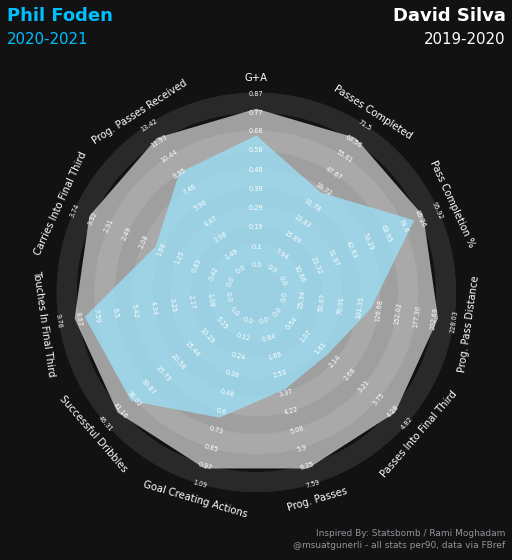

In [214]:
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1,Color_2],
                         alphas=[0.7,0.6],title=title,endnote=endnote,
                         compare=True)